In [14]:
# Load required libraries
library(tidyverse)

# Load your dataset
data <- read.csv("C:\\Users\\kehin\\Downloads\\archive (3)\\insurance.csv")



In [18]:
# Checking the dataset
glimpse(data)
colnames(data)


Rows: 1,338
Columns: 7
$ age      <int> 19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 1…
$ sex      <chr> "female", "male", "male", "male", "male", "female", "female",…
$ bmi      <dbl> 27.900, 33.770, 33.000, 22.705, 28.880, 25.740, 33.440, 27.74…
$ children <int> 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0…
$ smoker   <chr> "yes", "no", "no", "no", "no", "no", "no", "no", "no", "no", …
$ region   <chr> "southwest", "southeast", "southeast", "northwest", "northwes…
$ charges  <dbl> 16884.924, 1725.552, 4449.462, 21984.471, 3866.855, 3756.622,…


[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

In [26]:
# Data cleaning: drop missing values if any
data <- data %>% drop_na()

# Convert categorical variables to factors
data <- data %>%
  mutate(
    sex = as.factor(sex),
    smoker = as.factor(smoker),
    region = as.factor(region)
  )


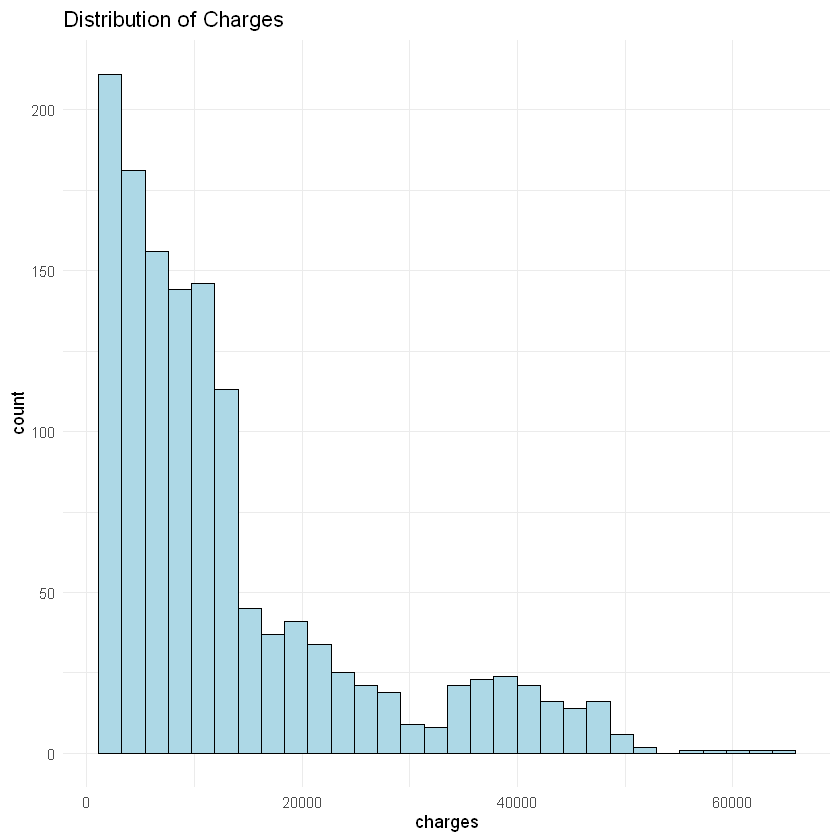

In [28]:
# Exploratory plot: distribution of charges
ggplot(data, aes(x = charges)) +
  geom_histogram(bins = 30, fill = "lightblue", color = "black") +
  labs(title = "Distribution of Charges") +
  theme_minimal()

In [30]:
# Linear regression: predict charges
model <- lm(charges ~ age + bmi + children + sex + smoker + region, data = data)

# Model summary
summary(model)



Call:
lm(formula = charges ~ age + bmi + children + sex + smoker + 
    region, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
sexmale           -131.3      332.9  -0.394 0.693348    
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 D

In [32]:
# Calculate RMSE and R-squared
predictions <- predict(model, data)
rmse <- sqrt(mean((predictions - data$charges)^2))
r_squared <- summary(model)$r.squared

cat("RMSE:", round(rmse, 2), "\n")
cat("R-squared:", round(r_squared, 3), "\n")


RMSE: 6041.68 
R-squared: 0.751 


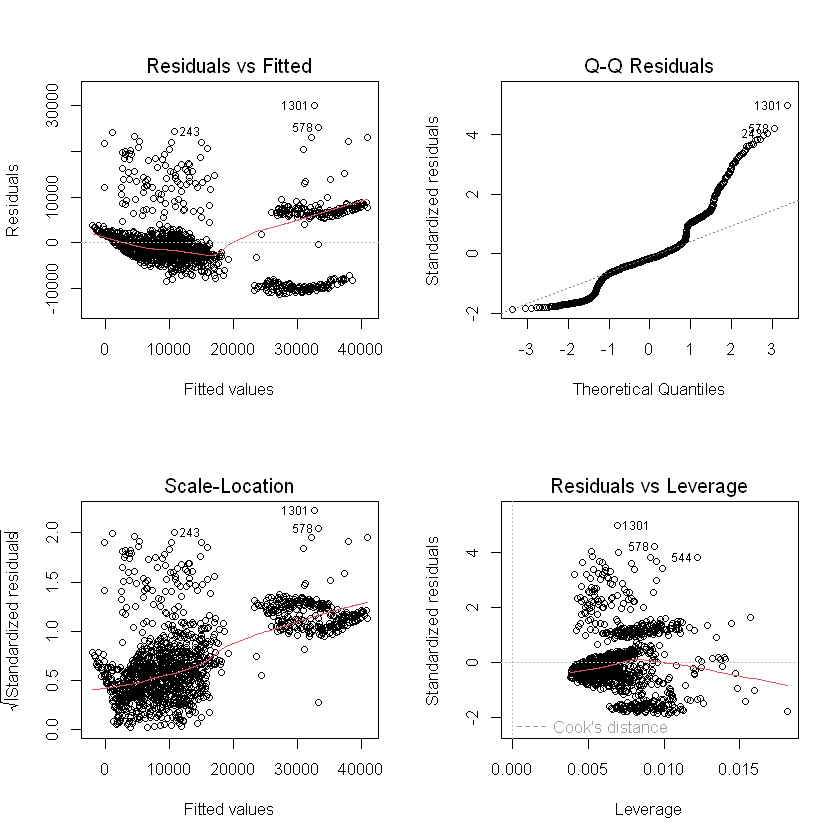

In [34]:
# Diagnostic plots
par(mfrow = c(2, 2))
plot(model)